In [2]:
import matplotlib.pyplot as plt
import numpy as np
#from mpl_toolkits.mplot2d import axes3d #tool for 3d plotting
import matplotlib.animation as animation
from scipy.stats import norm
from scipy import signal
from PIL import Image #tool for naimating 3d plotting
from matplotlib import cm

Enter a fluorescence lifetime, τ_1, in ns (from 0.05 to 100, two decimal figures allowed):  1
Enter a fluorescence lifetime, τ_2, in ns (from 0.05 to 100, two decimal figures allowed):  3


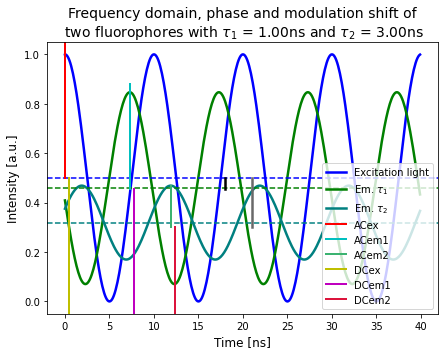

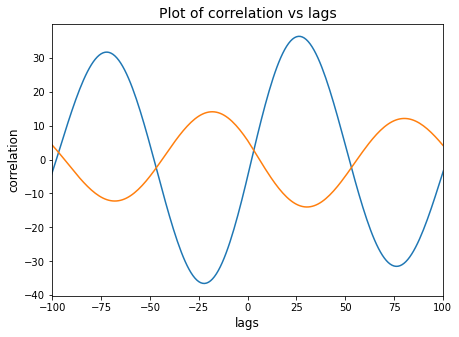

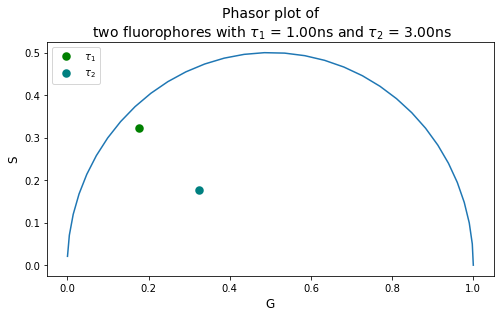

The value of Mod(τ_1) as (ACem1/DCem1)/(ACex/DCex) is 0.8467 with an error of 0.0004 %
which gives a value of τ_1: 1.0000 ns with an error of 0.0012 %

The value of Mod(τ_2) as (ACem2/DCem2)/(ACex/DCex) is 0.4686 with an error of 0.0032 %
which gives a value of τ_2: 3.0001 ns with an error of 0.0041 %

τ_2 is 3.00 times larger than τ_1 so its Modulation is 2.06 times shorter.

The value of φ_1 from the cross-correlation is 51.13 with an error of 42.04 %
which gives a value of τ_1: 1.8760 ns with an error of 87.6045 %

The value of φ_2 from the cross-correlation is 0.85 with an error of 99.21 %
which gives a value of τ_2: 1.8101 ns with an error of 39.6636 %


In [4]:
### Phasor plot ###

# The frequency domain of the phasor plot transformation can be performed using the Weber notation:
# G = M*cos(phi)... (1)
# S = M*sen(phi)... (2)

# First the FD-FLIM part
E_0 = 1 #Steady-state intensity. Arbitrary units
E_w = 1 #Amplitude of the time-varying intensity. Arbitrary units
T = 10 # time in nanoseconds. Period of repetition of the excitation light, for a 1.0 ns probe one can use ~100MHz frequency, so 10 ns
phi_E = 0 #phase of the excitation light. angle in grads
### Function E(t) ###
w = (2*np.pi)/T
t = np.arange(0, 40, 0.1)
E_t = E_0 + E_w*np.cos(w*t + phi_E)
### Emission F(t) ###
# The fluorescence emission at time , t is
# F(t) = E_0*a_s*tau_s + E_w*a_s*tau_s*Ms*cos(w*t + phi_E - phi_F)
#F = 100000000                                   # Frequency of the excitation light. In Hz
a_s = 1.0                                       # fractional number from 0.0 to 1.0 indicating how much of the signal
                                                # corresponds to a specific fluorophore emission 
tau_1 = float(input('Enter a fluorescence lifetime, \u03C4_1, in ns (from 0.05 to 100, two decimal figures allowed): '))  # lifetime in ns
tau_2 = float(input('Enter a fluorescence lifetime, \u03C4_2, in ns (from 0.05 to 100, two decimal figures allowed): '))  # lifetime in ns
Ms_1 = 1 / np.sqrt(1 + (w*tau_1)**2)
Ms_2 = 1 / np.sqrt(1 + (w*tau_2)**2)
phi_F1 = np.degrees(w*tau_1)                     # phi_F is the phase in rad from the tau_s as
                                                 # phi_F = 2*pi*F*tau_s, where F for tau = 1.0ns is 100MHz = 100 000 000 s^(-1)
phi_F2 = np.degrees(w*tau_2)
F_t1 = E_0*a_s*tau_1 + E_w*a_s*tau_1*Ms_1*np.cos(w*t + phi_E - phi_F1)
F_t2 = E_0*a_s*tau_2 + E_w*a_s*tau_2*Ms_2*np.cos(w*t + phi_E - phi_F2)
# Let's normalize the functions above #
max_E = max(E_t)
norm_E = E_t/max_E
max_F1 = max(F_t1)
norm_F1 = F_t1/max_F1                 # Normalized F_t1 but it has a maximum value of 1.0, so the entire plot is levered to that number
mod_F1 = (F_t1/max_F1)*Ms_1           # Multiplying norm_F1 by the modulation Ms_1, then it returns the plot to the maximum value of M_f
max_F2 = max(F_t2)
norm_F2 = F_t2/max_F2                 # Normalized F_t2 but it has a maximum value of 1.0, so the entire plot is levered to that number
mod_F2 = (F_t2/max_F2)*Ms_2
# Adding the AC/DC lines to calculate the modulation shift #
mean_E = np.mean(norm_E)
mean_F1 = np.mean(mod_F1)
max_E = max(norm_E)
max_F1 = max(mod_F1)
mean_F2 = np.mean(mod_F2)
max_F2 = max(mod_F2)
### AC lines ###
ACex = max_E - mean_E
ACem1 = max_F1 - mean_F1
ACem2 = max_F2 - mean_F2
DCex = mean_E - 0.0
DCem1 = mean_F1 - 0.0
DCem2 = mean_F2 - 0.0

### Modulation and lifetime from AC/DC ratio ###
Mod1 = (ACem1/DCem1)/(ACex/DCex)
tau_mod1 = (np.sqrt(1 - Mod1**2))/(Mod1*w)
Mod2 = (ACem2/DCem2)/(ACex/DCex)
tau_mod2 = (np.sqrt(1 - (Mod2)**2))/(Mod2*w)
### Error calculation ###
Mod1_err = (abs(Ms_1-Mod1)/Ms_1)*100
tau1_err = (abs(tau_1-tau_mod1)/tau_1)*100
Mod2_err = (abs(Ms_2-Mod2)/Ms_2)*100
tau2_err = (abs(tau_2-tau_mod2)/tau_2)*100

#Calculation of phase delay (phi) using cross-correlation#
corr1 = signal.correlate(norm_E - abs(mean_E), mod_F1 - abs(mean_F1), mode="full") #correlation
lags1 = signal.correlation_lags(norm_E.size, norm_F1.size, mode="full")
corr2 = signal.correlate(norm_E - abs(mean_E), mod_F2 - abs(mean_F2), mode="full") #correlation
lags2 = signal.correlation_lags(norm_E.size, mod_F2.size, mode="full")

# lags: Returns an array containing cross-correlation lag/displacement indices. 
# Indices can be indexed with the np.argmax of the correlation to return the lag/displacement.
theta1 = lags1[np.argmax(corr1)] + 2*np.pi*np.floor(lags1[np.argmax(corr1)]/(2*np.pi))
tan_theta1 = np.tan(theta1)
tau_theta1 = tan_theta1/w

theta2 = lags2[np.argmax(corr2)] - 2*np.pi*np.floor(lags2[np.argmax(corr2)]/(2*np.pi))    
tan_theta2 = np.tan(theta2)
tau_theta2 = tan_theta2/w

### Error calculation ###

phi1_err = (abs(phi_F1-theta1)/phi_F1)
phi2_err = (abs(phi_F2-theta2)/phi_F2)
phi1_err_per = (abs(phi_F1-theta1)/phi_F1)*100
phi2_err_per = (abs(phi_F2-theta2)/phi_F2)*100
tau1_phi_err = (abs(tau_1-tau_theta1)/tau_1)*100
tau2_phi_err = (abs(tau_2-tau_theta2)/tau_2)*100

#From the above, the most important part is the Mod value which is going to be multiplied by the normalized gauss

# Calculation of rMod from the equation
# rMod = 0.5316*rtau + 0.4684, where rMod = Mod(tau_1)/Mod(tau_2)
rtau = tau_mod2/tau_mod1
rMod = 0.5316*rtau + 0.4684

### Phasor Plot ###

# Calculating G and S #

G1 = Mod1*np.cos(theta1+(np.pi/2))/2 + 1/2
S1 = Mod1*np.sin(theta1)/2

G2 = Mod2*np.cos(theta2+(np.pi/2))/2 + 1/2
S2 = Mod2*np.sin(theta2)/2

# Unitary Circle #

theta = np.arange(0.0, np.pi, 0.1)
cos = np.cos(theta)
sen = np.sin(theta)

#FD-FLIM plot
plt.figure(figsize=(7,5))
plt.plot(t, norm_E, color = 'b', linewidth = 2.5, label = 'Excitation light')
plt.plot(t, mod_F1, color = 'g', linewidth = 2.5, label = 'Em. $\u03c4_1$')
plt.plot(t, mod_F2, color = 'teal', linewidth = 2.5, label = 'Em. $\u03c4_2$')
plt.axhline(mean_E, 0, 4, color = 'b', linestyle = '--')
plt.axhline(mean_F1, 0, 4, color = 'g', linestyle = '--')
plt.axhline(mean_F2, 0, 4, color = 'teal', linestyle = '--')
plt.axvline(np.argmax(norm_E), mean_E, max(norm_E), color = 'r', linestyle = '-', linewidth = 2.0, label = 'ACex')            #plotting ACex
plt.axvline(0.1*np.argmax(mod_F1), mean_F1, max(mod_F1), color = 'c', linestyle = '-', linewidth = 2.0, label = 'ACem1')          #plotting ACem
plt.axvline(0.1*np.argmax(mod_F2), mean_F2, max(mod_F2), color = 'mediumseagreen', linestyle = '-', linewidth = 2.0, label = 'ACem2')
plt.axvline(np.argmax(norm_E) + 0.5, 0.0, mean_E, color = 'y', linestyle = '-', linewidth = 2.0, label = 'DCex')              #Plotting DCex
plt.axvline(0.1*np.argmax(mod_F1) + 0.5, 0.0, mean_F1, color = 'm', linestyle = '-', linewidth = 2.0, label = 'DCem1')           #Plotting DCem
plt.axvline(0.1*np.argmax(mod_F2) + 0.5, 0.0, mean_F2, color = 'crimson', linestyle = '-', linewidth = 2.0, label = 'DCem2')
plt.axvline(18, mean_F1, mean_E, color = 'k', linestyle = '-', linewidth = 2.5)
plt.axvline(21, mean_F2, mean_E, color = 'dimgrey', linestyle = '-', linewidth = 2.5)
#plt.annotate('Mod', xy=(19,0.47), xytext=(13, 0.95), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 11)
plt.title('Frequency domain, phase and modulation shift of\n two fluorophores with $\u03c4_1$ = {:.2f}ns and $\u03c4_2$ = {:.2f}ns'.format(tau_1, tau_2), fontsize = 14)
plt.xlabel("Time [ns]", fontsize = 12)
plt.ylabel("Intensity [a.u.]", fontsize = 12)
plt.legend(loc = 4)
#plt.savefig('FD_FLIM.tif')
plt.show()

#Correlation lags
plt.figure(figsize=(7,5))
plt.plot(lags1, corr1)
plt.plot(lags2, corr2)
plt.xlabel('lags', fontsize = 12)
plt.xlim(-100, 100)
plt.ylabel('correlation', fontsize = 12)
plt.title('Plot of correlation vs lags', fontsize = 14)
plt.show()


#Phasor plot
plt.figure(figsize=(8,4.3))
plt.plot(cos/2 + 1/2, sen/2)
plt.scatter(G1, abs(S1), c = 'g', linewidth = 2.5, label = '$\u03c4_1$')
plt.scatter(G2, abs(S2), c = 'teal', linewidth = 2.5, label = '$\u03c4_2$')
plt.title('Phasor plot of\n two fluorophores with $\u03c4_1$ = {:.2f}ns and $\u03c4_2$ = {:.2f}ns'.format(tau_1, tau_2), fontsize = 14)
plt.xlabel('G', fontsize = 12)
plt.ylabel('S', fontsize = 12)
plt.legend(loc = 2)
plt.show()

#print(theta)
print('The value of Mod(\u03c4_1) as (ACem1/DCem1)/(ACex/DCex) is {:.4f} with an error of {:.4f} %'.format(Mod1,Mod1_err))
print('which gives a value of \u03C4_1: {:.4f} ns with an error of {:.4f} %'.format(tau_mod1,tau1_err))
print('\nThe value of Mod(\u03c4_2) as (ACem2/DCem2)/(ACex/DCex) is {:.4f} with an error of {:.4f} %'.format(Mod2,Mod2_err))
print('which gives a value of \u03C4_2: {:.4f} ns with an error of {:.4f} %'.format(tau_mod2,tau2_err))
print('\n\u03c4_2 is {:.2f} times larger than \u03c4_1 so its Modulation is {:.2f} times shorter.'.format(rtau, rMod))
print('\nThe value of \u03c6_1 from the cross-correlation is {:.2f} with an error of {:.2f} %'.format(theta1,phi1_err_per))
print('which gives a value of \u03C4_1: {:.4f} ns with an error of {:.4f} %'.format(abs(tau_theta1),tau1_phi_err))
print('\nThe value of \u03c6_2 from the cross-correlation is {:.2f} with an error of {:.2f} %'.format(theta2,phi2_err_per))
print('which gives a value of \u03C4_2: {:.4f} ns with an error of {:.4f} %'.format(abs(tau_theta2),tau2_phi_err))


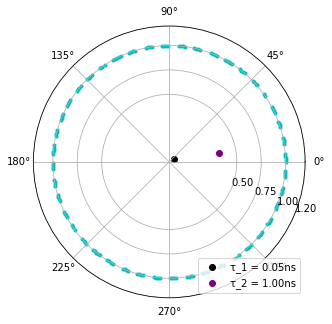

In [3]:
theta = np.floor(np.degrees(np.arange(0.0, 1.005*np.pi,0.018)))
#print(theta)

cos = np.cos(theta)
sen = np.sin(theta)

c = cos**2 + sen**2

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='polar')
p = ax.scatter(theta, c, c='c', marker='.')
t1 = ax.scatter(x = G1, y = S1, c = 'k', label='\u03c4_1 = {:.2f}ns'.format(tau_1))
t2 = ax.scatter(x = G2, y = S2, c = 'purple', label='\u03c4_2 = {:.2f}ns'.format(tau_2))
ax.set_rticks([0.5,0.75, 1.0, 1.2])  # Less radial ticks
ax.set_rlabel_position(-22.5)      # Move radial labels away from plotted line

ax.set_thetamin(0)
ax.set_thetamax(360)
ax.grid('True')
plt.legend(loc=4)

(0.0, 1.0)

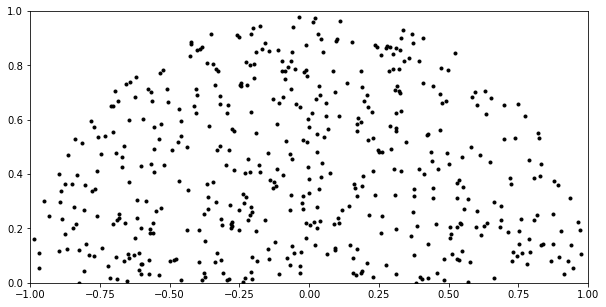

In [158]:
size = 1000
t  = np.random.random(size)*np.pi*2
u  = np.random.random(size) + np.random.random(size)
r = np.where(u > 1, 2 - u, u)
x = r*np.cos(t)
y = r*np.sin(t)
coor = (x,y)
for idx, value in enumerate(y):
    if value<0:
        x[idx]=-3
        y[idx]=-3
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(x, y, color= 'k', marker = '.')
plt.xlim(-1,1)
plt.ylim(0,1)

In [19]:
print('h\u0305')

h̅


In [37]:
# Calculating G and S #

G1 = Mod1*np.cos(phi_F1)
G2 = Mod2*np.cos(phi_F2)
S1 = Mod1*np.sin(phi_F1)
S2 = Mod2*np.sin(phi_F2)

In [39]:
x= 4
y = 5

c = y/x
print(c)

entero = np.floor(c)
print(entero)


1.25
1.0
